In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt
import string
from pickle import dump
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
from google.colab import files
uploaded = files.upload()

Saving emails.csv to emails.csv


In [18]:
dataset = pd.read_csv('/content/emails.csv')
dataset.shape

(5728, 2)

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


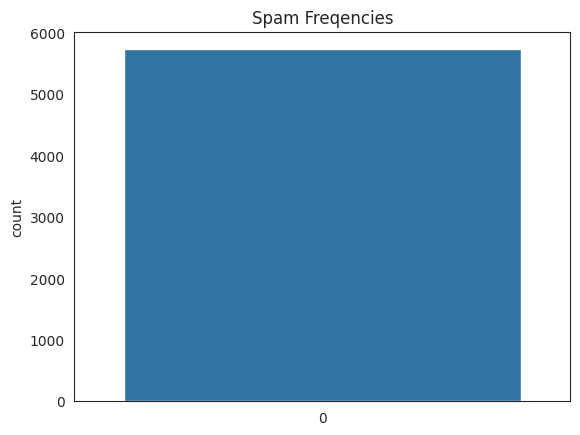

In [20]:
# Visualize spam  frequenices
plt.figure(dpi=100)
sns.countplot(dataset['spam'])
plt.title("Spam Freqencies")
plt.show()

In [21]:
dataset.isnull().sum()

text    0
spam    0
dtype: int64

In [7]:
dataset.drop_duplicates(inplace=True)

In [22]:
def process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean

In [ ]:
# Fit the CountVectorizer to data
message = CountVectorizer(analyzer=process).fit_transform(dataset['text'])

In [10]:
# Save the vectorizer
dump(message, open("/content/vectorizer.pkl", "wb"))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(message, dataset['spam'], test_size=0.20, random_state=0)

In [12]:
model = MultinomialNB()

In [13]:
# Model training
model.fit(X_train, y_train)
dump(model, open("/content/model.pkl", 'wb'))

In [14]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100

99.20983318700614

In [16]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      0.99      0.99       870\n           1       0.97      1.00      0.98       269\n\n    accuracy                           0.99      1139\n   macro avg       0.98      0.99      0.99      1139\nweighted avg       0.99      0.99      0.99      1139\n'

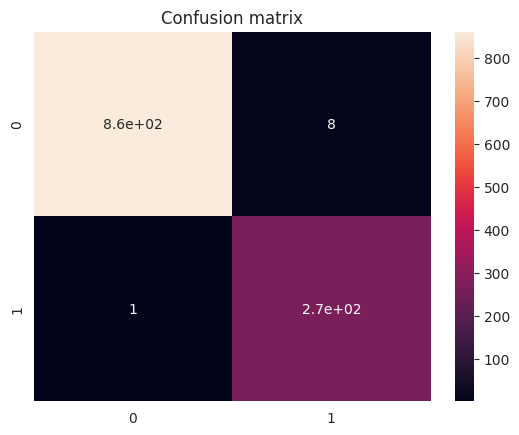

In [17]:
# Model Evaluation | Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(dpi=100)
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.show()